# Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Your Name</h2>
<h2>IREMIDE OYELAJA</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
Churn              3333 non-null int64
AccountWeeks       3333 non-null int64
ContractRenewal    3333 non-null int64
DataPlan           3333 non-null int64
DataUsage          3333 non-null float64
CustServCalls      3333 non-null int64
DayMins            3333 non-null float64
DayCalls           3333 non-null int64
MonthlyCharge      3333 non-null float64
OverageFee         3333 non-null float64
RoamMins           3333 non-null float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
data.shape

(3333, 11)

In [7]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

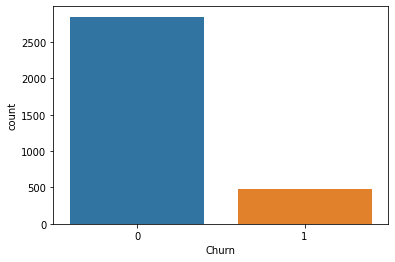

In [8]:
# Our label Distribution (countplot)
#it cn be observed here that there is class imbalance
sns.countplot(data['Churn'])

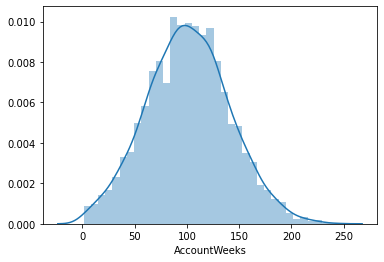

In [9]:
# Example EDA
sns.distplot(data['AccountWeeks'])

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

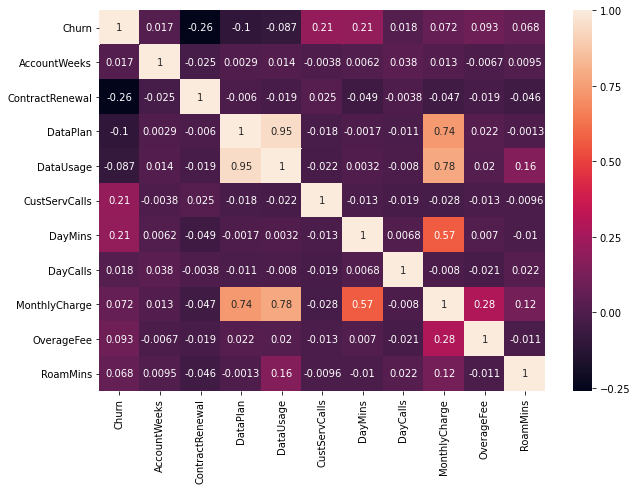

In [10]:
#it can be observed that data plan and data usage are highly correlated therefore one can be dropped 
plt.figure(figsize =(10,7))
sns.heatmap(data.corr(), annot= True)

In [11]:
data.drop('DataPlan', axis=1, inplace=True)

In [12]:
#split data
#X = data.drop('Churn', axis =1)
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [13]:
#check outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [14]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [15]:
#drop outliers
data_new = data.drop(outliers,axis = 0).reset_index(drop =True)
display(data_new)

,Churn,AccountWeeks,ContractRenewal,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0.00,0,243.4,114,52.0,6.06,12.2
3,0,121,1,2.03,3,218.2,88,87.3,17.43,7.5
4,0,117,1,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...
2914,0,79,1,0.00,2,134.7,98,40.0,9.49,11.8
2915,0,192,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,0,68,1,0.34,3,231.1,57,56.4,7.67,9.6
2917,0,28,1,0.00,2,180.8,109,56.0,14.44,14.1


In [16]:
X_new = data_new.drop('Churn', axis = 1)
print(X_new.shape)

(2919, 9)


In [17]:
#scale 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[ 0.69196206,  0.        ,  1.51796075, ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [ 0.1624696 ,  0.        ,  2.31721315, ...,  1.62161451,
        -0.10450144,  1.29308134],
       [ 0.9188874 ,  0.        , -0.64002073, ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.82087355,  0.        , -0.36827492, ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-1.82943062,  0.        , -0.64002073, ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.66958999,  0.        ,  2.31721315, ...,  2.74708237,
         1.30625356,  1.29308134]])

In [18]:
y_new = data_new['Churn']
print(y_new.value_counts())

0    2598
1     321
Name: Churn, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [20]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

In [21]:
#stacking models
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    return models

In [22]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_new, y_new, scoring='precision',
                             cv=cv, n_jobs=-1,
                             error_score= 'raise')
    return scores

In [23]:
models = get_models()
#evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)    
    model.fit(X_train,y_train)
    
    print('>%s %.3f (%.3f) [%.3f]' % (name, np.mean(scores), model.score(X_train, y_train) , model.score(X_test, y_test)))

>lr 0.697 (0.899) [0.894]
>knn 0.678 (0.937) [0.930]
>cart 0.619 (1.000) [0.925]


From above it is seen that decision tree i.e cart has the best model score

In [24]:
pred= model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       778
           1       0.67      0.65      0.66        98

    accuracy                           0.92       876
   macro avg       0.81      0.81      0.81       876
weighted avg       0.92      0.92      0.92       876



In [27]:
cm =(confusion_matrix(y_test,pred))
cm

array([[746,  32],
       [ 34,  64]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for imbalance class')

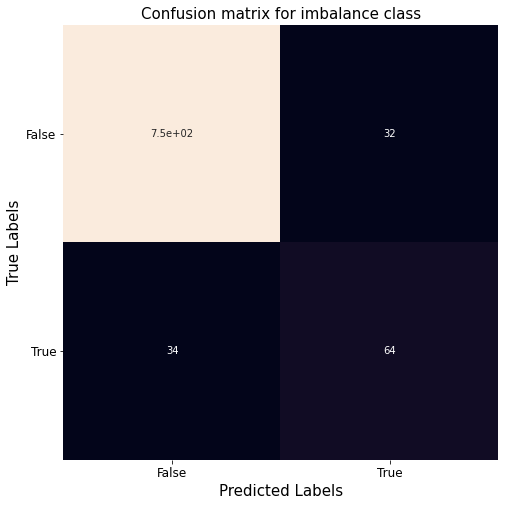

In [28]:
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title("Confusion matrix for imbalance class", fontsize= 15)

#HANDLING CLASS IMBALANCE

In [29]:
#handling data imbalance
from imblearn.over_sampling import SMOTE
smotee =SMOTE()
X_, y_= smotee.fit_sample(X_scaled,y_new)

Using TensorFlow backend.


In [30]:
from collections import Counter
counter1 = Counter(y_)
print(counter1) 

Counter({0: 2598, 1: 2598})


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.3, random_state=42)

In [32]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_, y_, scoring='precision',
                             cv=cv, n_jobs=-1,
                             error_score= 'raise')
    return scores

In [33]:
models = get_models()
#evaluate the models and store results
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    model.fit(X_train,y_train)
    
    print('>%s %.3f (%.3f) [%.3f]' % (name, np.mean(scores), model.score(X_train, y_train) , model.score(X_test, y_test)))

>lr 0.759 (0.757) [0.766]
>knn 0.874 (0.946) [0.915]
>cart 0.915 (1.000) [0.911]


In [34]:
pred= model.predict(X_test)


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       793
           1       0.91      0.91      0.91       766

    accuracy                           0.91      1559
   macro avg       0.91      0.91      0.91      1559
weighted avg       0.91      0.91      0.91      1559



In [36]:
cm =(confusion_matrix(y_test,pred))
cm


array([[724,  69],
       [ 70, 696]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix for balance class')

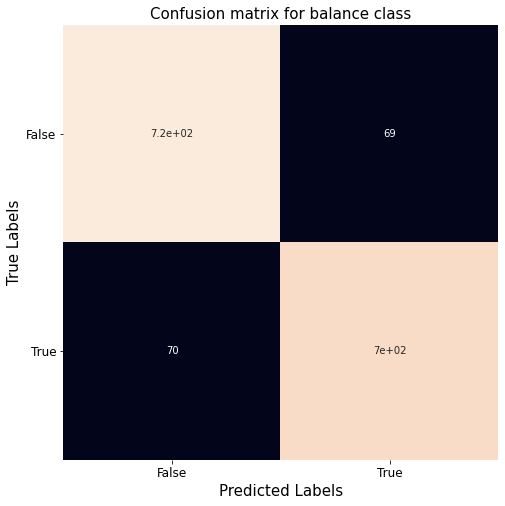

In [37]:
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
ax.set_title("Confusion matrix for balance class", fontsize= 15)

In [38]:
#It is observed that after oversampling the number of instances increased
print(X_.shape,'\n')
print(X_new.shape)

(5196, 9) 

(2919, 9)


# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

The best model is decision tree because it gave higest evaluation score at the first attempt.

Let us now focus on the classification metric.

After checkig the classification metric, I noticed that the evaluation score of class 1 is low because the data is imbalanced.

To correct an imbalanced dataset, I used SMOTE-oversample by increasing the minority class. 

This increased the evaluation score of class 1.